In [1]:
import pandas as pd

In [16]:
data = '09November-analysed/ResultsGPT_overproof_Sample_09November.xlsx'
data = '09November-analysed/ResultsGPT_impresso-nzz_Sample_09November.xlsx'
data = '09November-analysed/ResultsGPT_icdar-2017_Sample_09November.xlsx'

data = pd.read_excel(data)
data = data.fillna(" ")


In [49]:
data = '09November-analysed/ResultsGPT_icdar-2019_Sample_09November.xlsx'

data = pd.read_excel(data)
data = data.fillna(" ")
print(len(data))

data = data.drop_duplicates()
print(len(data))

data.to_excel('09November-analysed/ResultsGPT_icdar-2019_Sample_09November.xlsx')

1794
1170


In [22]:
dataframes = []
datasets = []

for element in [('09November-analysed/ResultsGPT_overproof_Sample_09November.xlsx', 'OVERPROOF'),
                ('09November-analysed/ResultsGPT_impresso-nzz_Sample_09November.xlsx', 'Impresso-NZZ'),
                ('09November-analysed/ResultsGPT_icdar-2017_Sample_09November.xlsx', 'ICDAR-2017')]:
    filename, dataset = element
    
    data = pd.read_excel(filename)

    print(len(data))
    data = data.fillna(" ")

    data = data.drop_duplicates()
    print(len(data))
    
    dataframes.append(data)
    datasets.append(dataset)
    
    

600
589
598
573
1200
1095


In [23]:
for data, dataset in zip(dataframes, datasets):

    # Analyzing the data per model and per prompt
    grouped_data = data.groupby(['model', 'prompt'])

    # Calculating metrics like Degradation Rate and Improvement Rate
    # Assuming 'Degradation Rate' and 'Improvement Rate' are columns in your dataset
    # Here we calculate the mean, but you can calculate other statistics as needed
    degradation_rate_mean = grouped_data['Degraded (y/n)'].mean()
    improvement_rate_mean = grouped_data['Improved (y/n)'].mean()

    # Display the results
    print("Degradation Rate per Model and Prompt:")
    print(degradation_rate_mean)
    print("\nImprovement Rate per Model and Prompt:")
    print(improvement_rate_mean)

    # Further statistical analysis can be done as needed


Degradation Rate per Model and Prompt:
model        prompt           
BLOOMZ-7.1B  prompt_basic_02      0.867347
             prompt_complex_02    0.061224
GPT-4        prompt_basic_02      0.081633
             prompt_complex_02    0.010204
LLAMA-2-7B   prompt_basic_02      0.909091
             prompt_complex_02    0.142857
Name: Degraded (y/n), dtype: float64

Improvement Rate per Model and Prompt:
model        prompt           
BLOOMZ-7.1B  prompt_basic_02      0.122449
             prompt_complex_02    0.928571
GPT-4        prompt_basic_02      0.918367
             prompt_complex_02    0.989796
LLAMA-2-7B   prompt_basic_02      0.080808
             prompt_complex_02    0.857143
Name: Improved (y/n), dtype: float64
Degradation Rate per Model and Prompt:
model        prompt           
BLOOMZ-7.1B  prompt_basic_02      0.812500
             prompt_complex_02    0.395833
GPT-4        prompt_basic_02      0.166667
             prompt_complex_02    0.085106
LLAMA-2-7B   prompt_basic_0

In [25]:
data.columns

Index(['language', 'filename', 'dataset_name', 'prompt', 'model',
       'Degraded (y/n)', 'Degradation Rate', 'Improved (y/n)',
       'Improvement Rate', 'Hallucination Rate', 'Response Rate', 'ocr.line',
       'groundtruth.line', 'prediction.line.postprocessed',
       'groundtruth.sentence', 'prediction.sentence',
       'prediction.sentence.postprocessed', 'ocr.sentence',
       'groundtruth.region', 'ocr.region', 'prediction.region', 'prompt_text',
       'type', 'file', 'name_of_file_idx', 'prediction.region.postprocessed',
       'post-processings', 'length_prediction_tokens', 'length_ocr_tokens',
       'length_groundtruth_tokens', 'length_groundtruth_chars',
       'length_prediction_chars', 'length_ocr_chars', 'sentence-lev-ocr',
       'sentence-lev-pred', 'sentence-lev-improvement',
       'quality-band-sentence-postprocessed',
       'sentence-lev-pred-postprocessed',
       'sentence-lev-improvement-postprocessed', 'region-lev-ocr',
       'region-lev-pred', 'region-lev

------------------------------------------------------------
OVERPROOF
------------------------------------------------------------


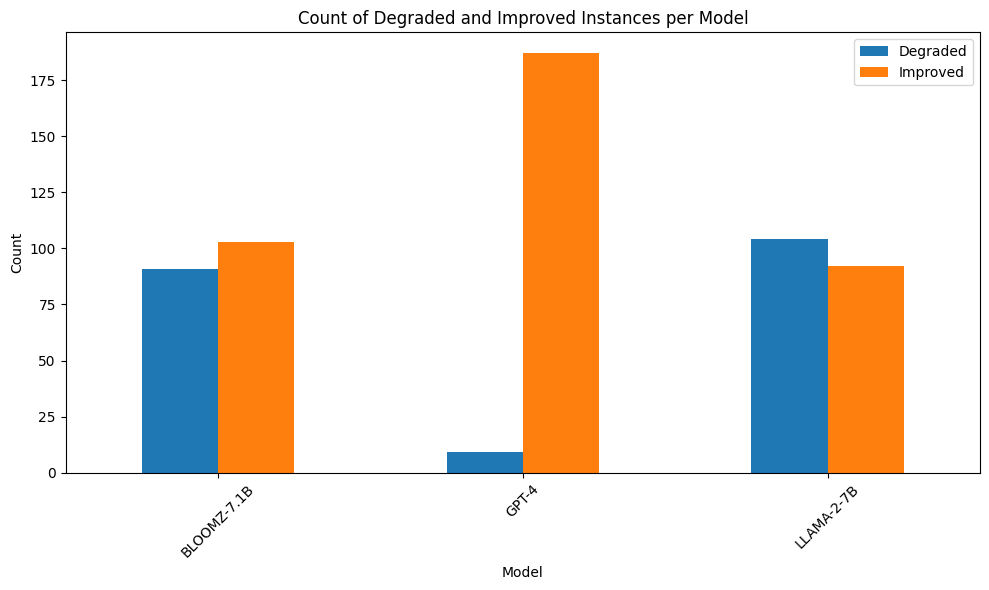

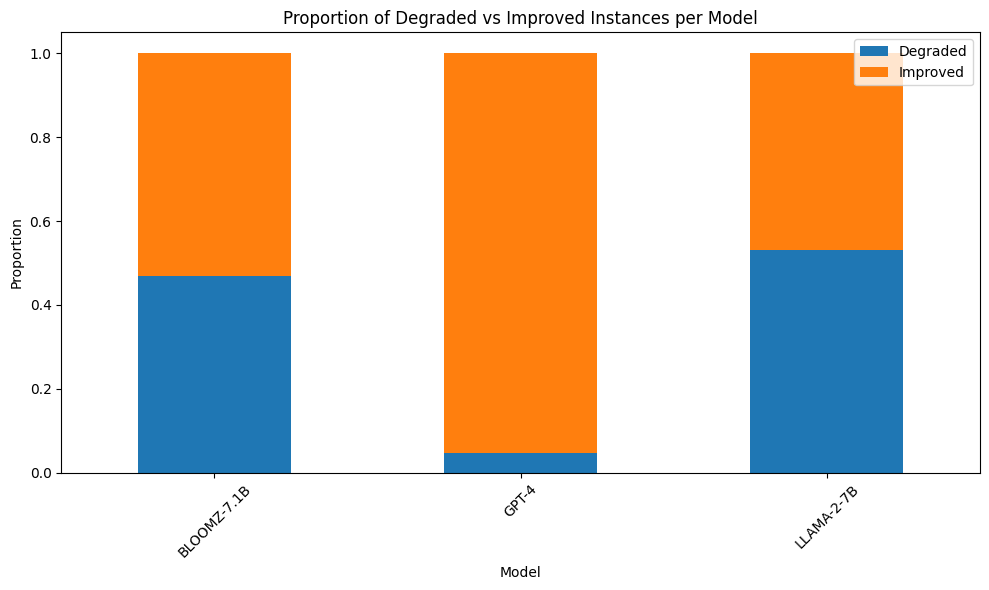

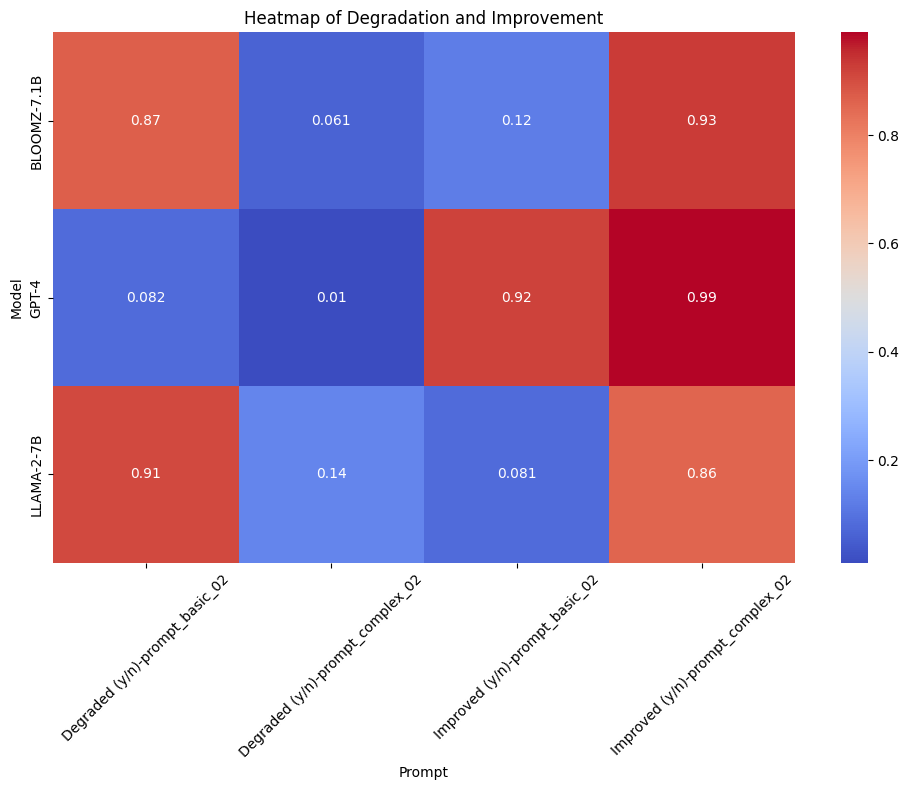

------------------------------------------------------------
Impresso-NZZ
------------------------------------------------------------


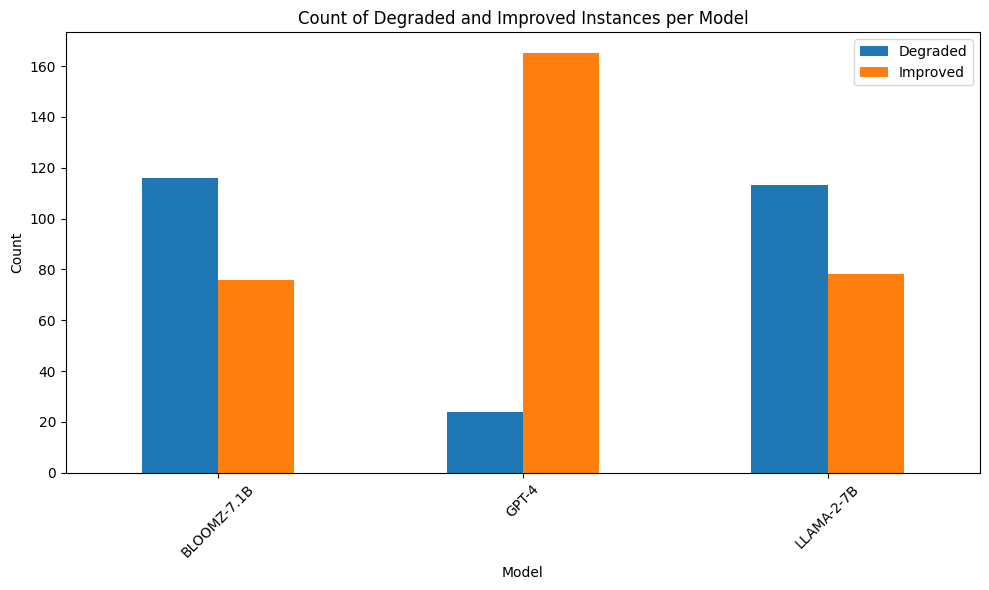

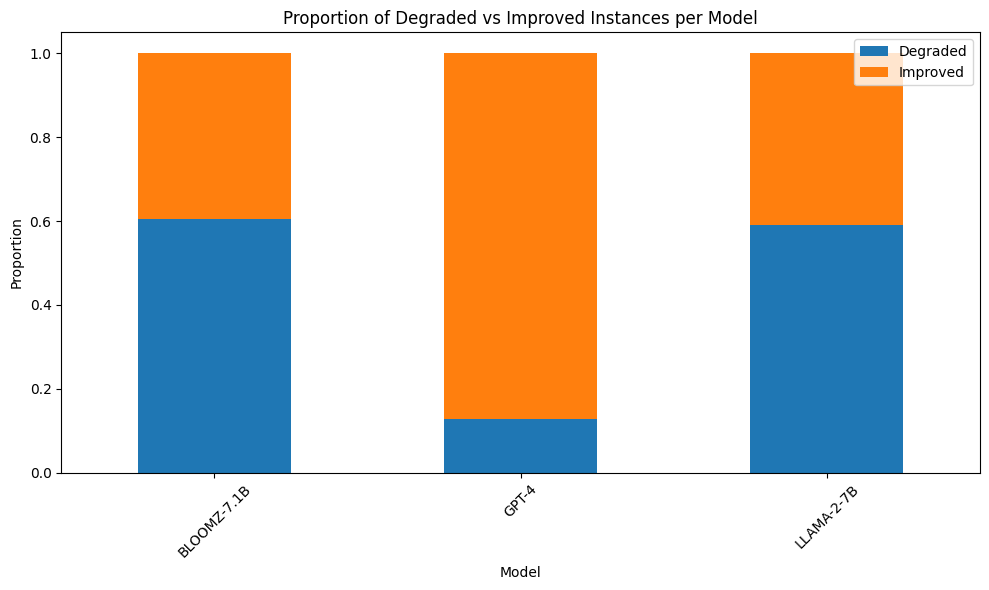

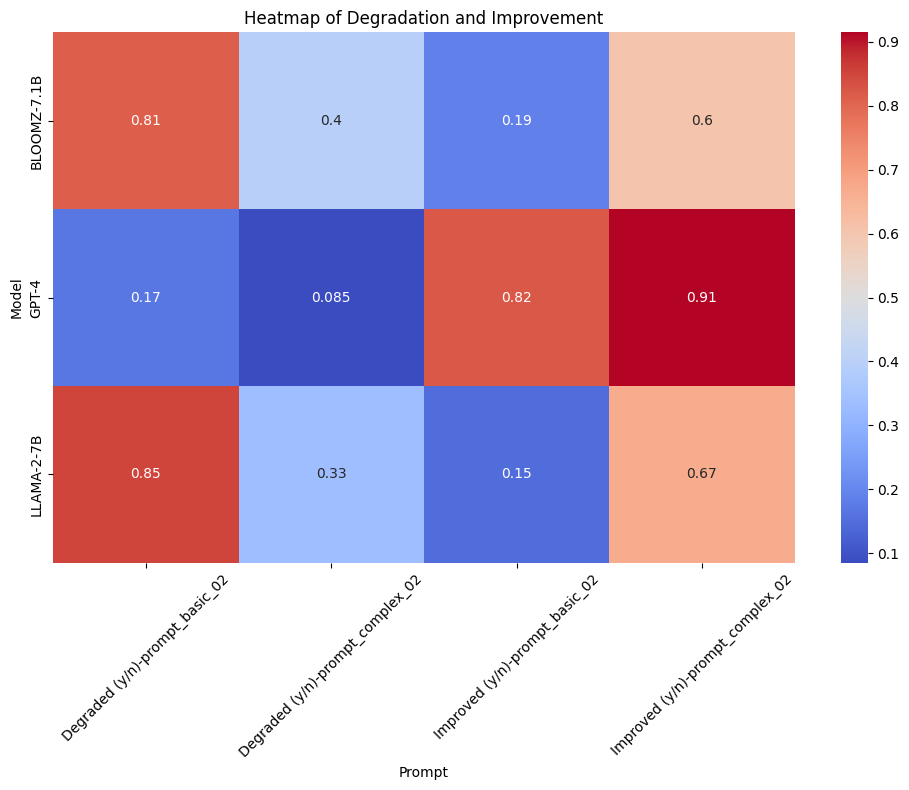

------------------------------------------------------------
ICDAR-2017
------------------------------------------------------------


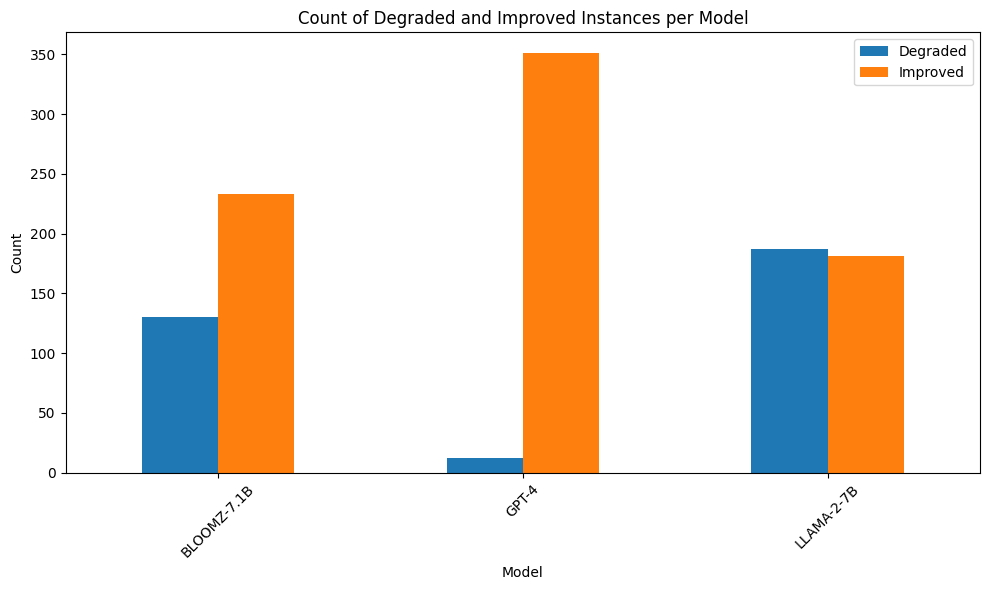

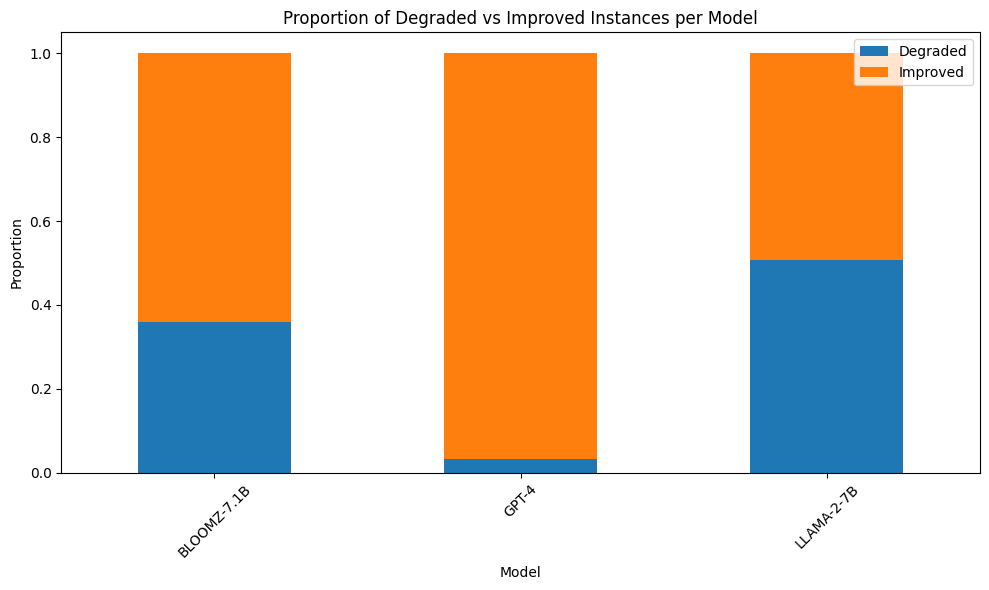

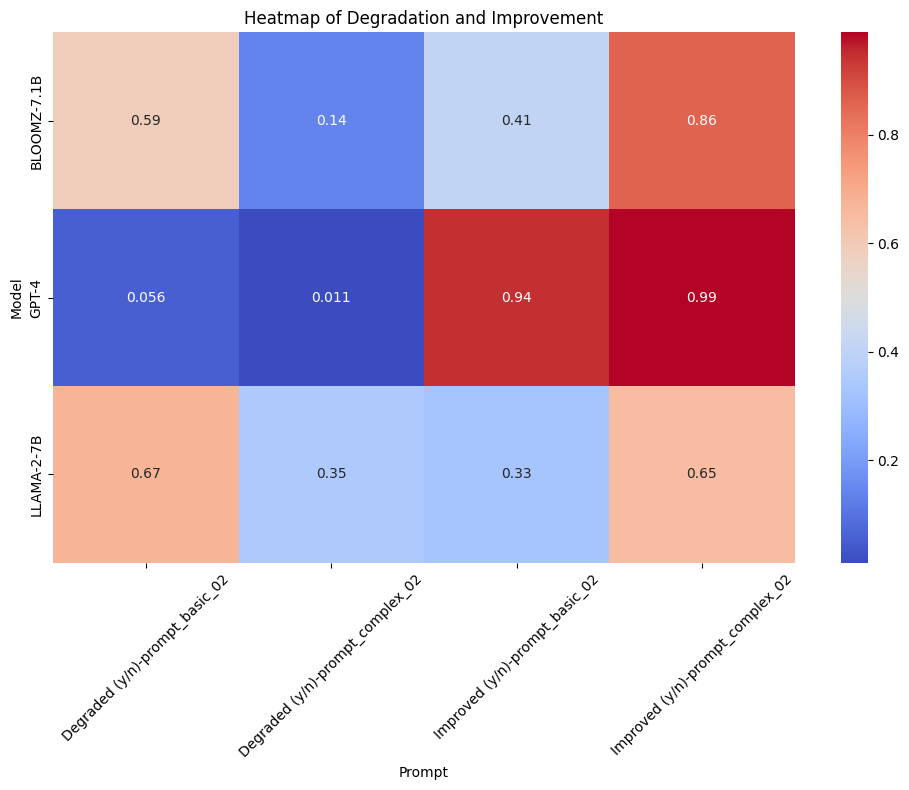

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

for data, dataset in zip(dataframes, datasets):
    print('--'*30)
    print(dataset)
    print('--'*30)
    # Convert 'Degraded (y/n)' and 'Improved (y/n)' to Boolean if they are not already
    data['Degraded (y/n)'] = data['Degraded (y/n)'].astype(bool)
    data['Improved (y/n)'] = data['Improved (y/n)'].astype(bool)

    # Bar Plot: Count of Degraded and Improved per Model
    plt.figure(figsize=(10, 6))
    degraded_count = data.groupby('model')['Degraded (y/n)'].sum()
    improved_count = data.groupby('model')['Improved (y/n)'].sum()
    count_df = pd.DataFrame({'Degraded': degraded_count, 'Improved': improved_count})
    count_df.plot(kind='bar', ax=plt.gca())
    plt.title('Count of Degraded and Improved Instances per Model')
    plt.ylabel('Count')
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Stacked Bar Plot: Proportion of Degraded vs Improved per Model
    plt.figure(figsize=(10, 6))
    prop_df = count_df.div(count_df.sum(axis=1), axis=0)
    prop_df.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title('Proportion of Degraded vs Improved Instances per Model')
    plt.ylabel('Proportion')
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Heatmap: Degradation and Improvement Across Models and Prompts
    plt.figure(figsize=(10, 8))
    pivot_table = pd.pivot_table(data, values=['Degraded (y/n)', 'Improved (y/n)'], index='model', columns='prompt', aggfunc='mean')
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
    plt.title('Heatmap of Degradation and Improvement')
    plt.ylabel('Model')
    plt.xlabel('Prompt')
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()


In [29]:
data.columns

Index(['language', 'filename', 'dataset_name', 'Degraded (y/n)',
       'Degradation Rate', 'Improved (y/n)', 'Improvement Rate',
       'Hallucination Rate', 'Response Rate', 'prompt', 'model',
       'groundtruth.line', 'ocr.line', 'prediction.line',
       'prediction.line.postprocessed', 'prediction.sentence',
       'groundtruth.sentence', 'prediction.sentence.postprocessed',
       'ocr.sentence', 'ocr.region', 'groundtruth.region', 'prediction.region',
       'prediction.region.postprocessed', 'prompt_text', 'type', 'file',
       'name_of_file_idx', 'post-processings', 'length_prediction_tokens',
       'length_ocr_tokens', 'length_groundtruth_tokens',
       'length_groundtruth_chars', 'length_prediction_chars',
       'length_ocr_chars', 'sentence-lev-ocr', 'sentence-lev-pred',
       'sentence-lev-improvement', 'quality-band-sentence-postprocessed',
       'sentence-lev-pred-postprocessed',
       'sentence-lev-improvement-postprocessed', 'region-lev-ocr',
       'region-lev

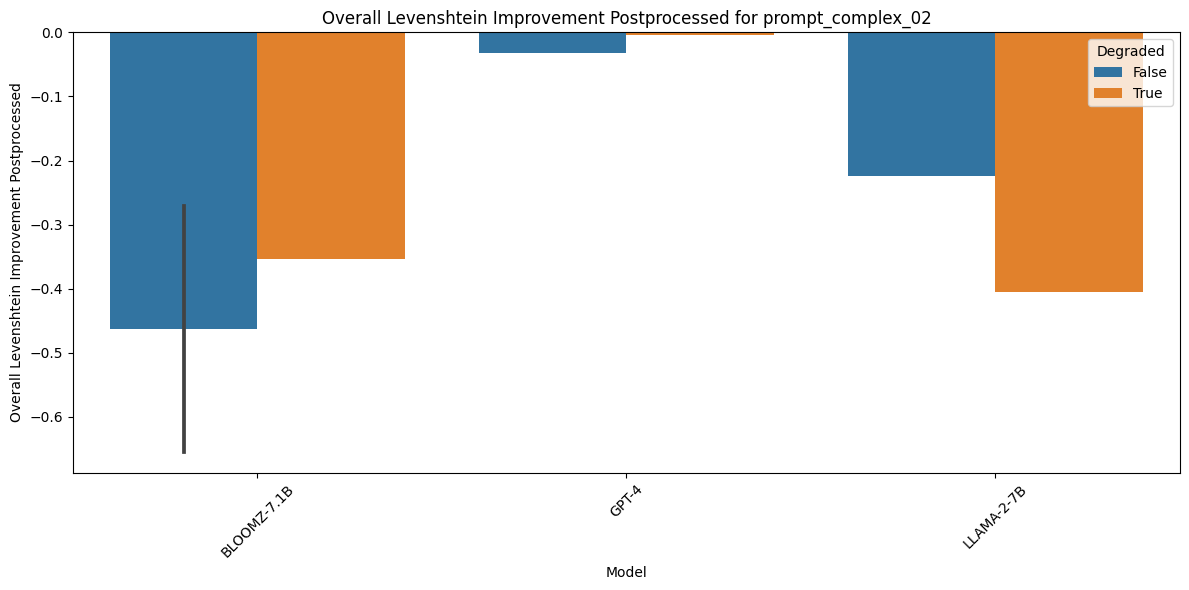

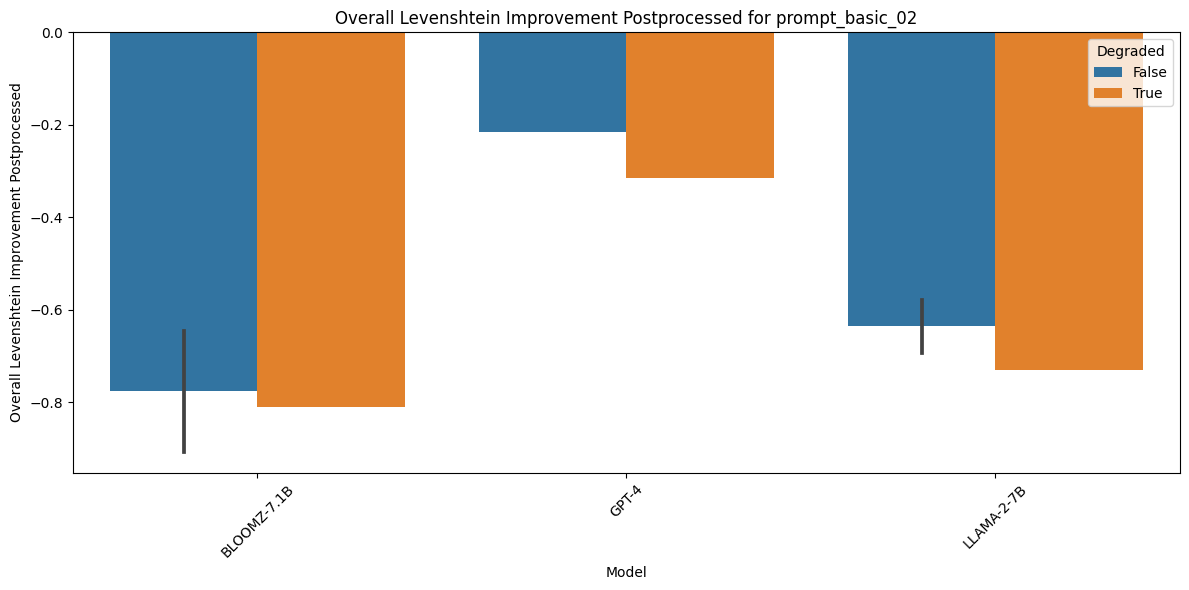

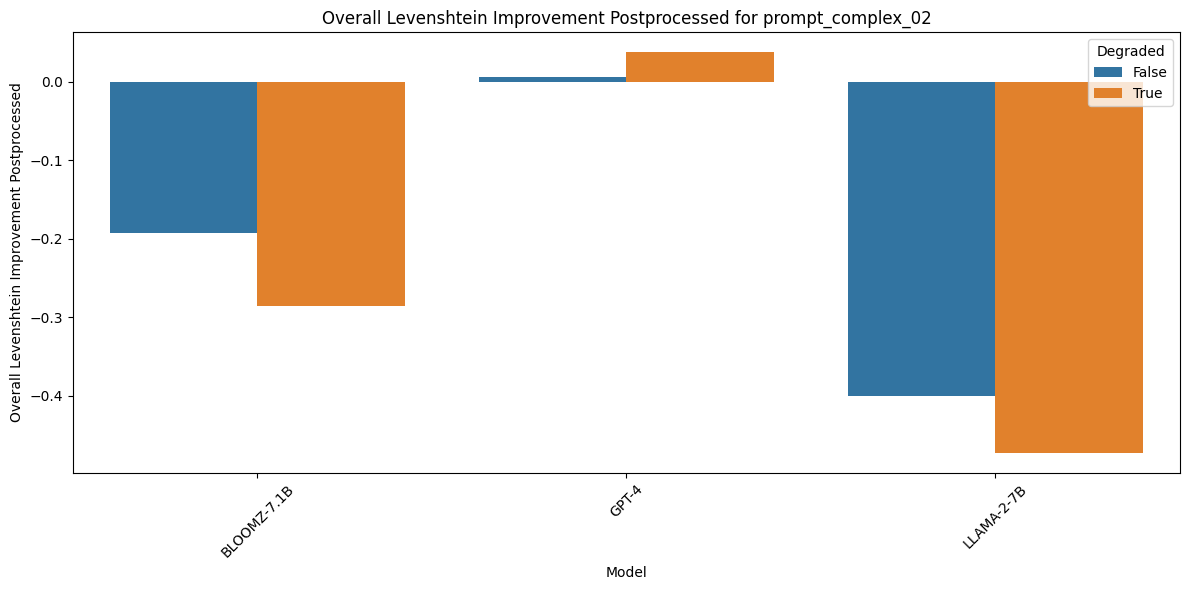

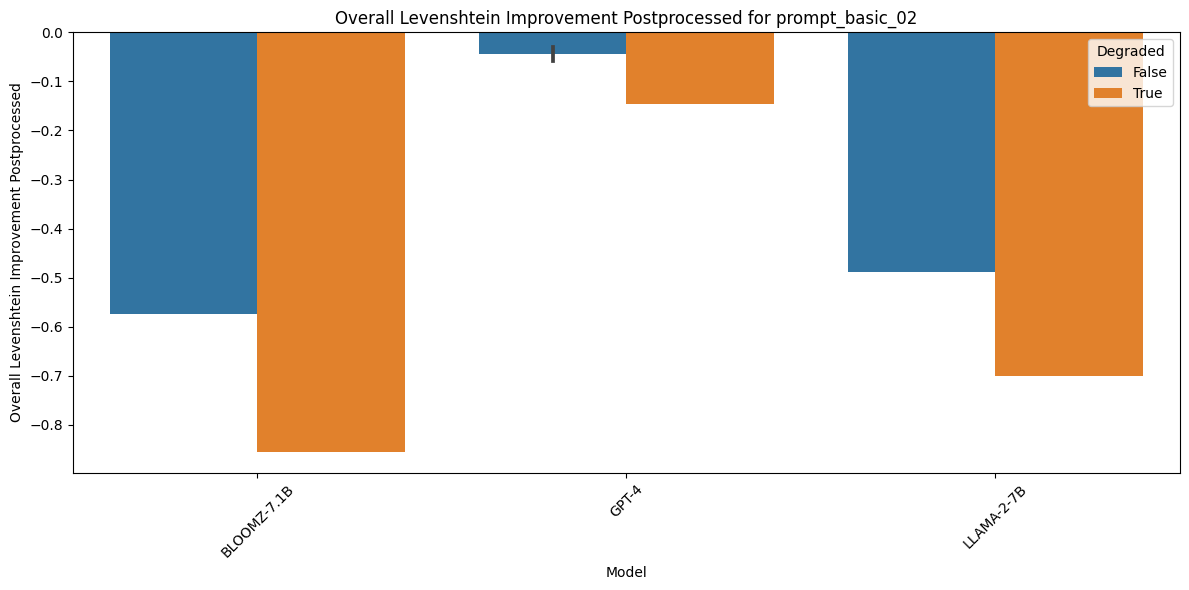

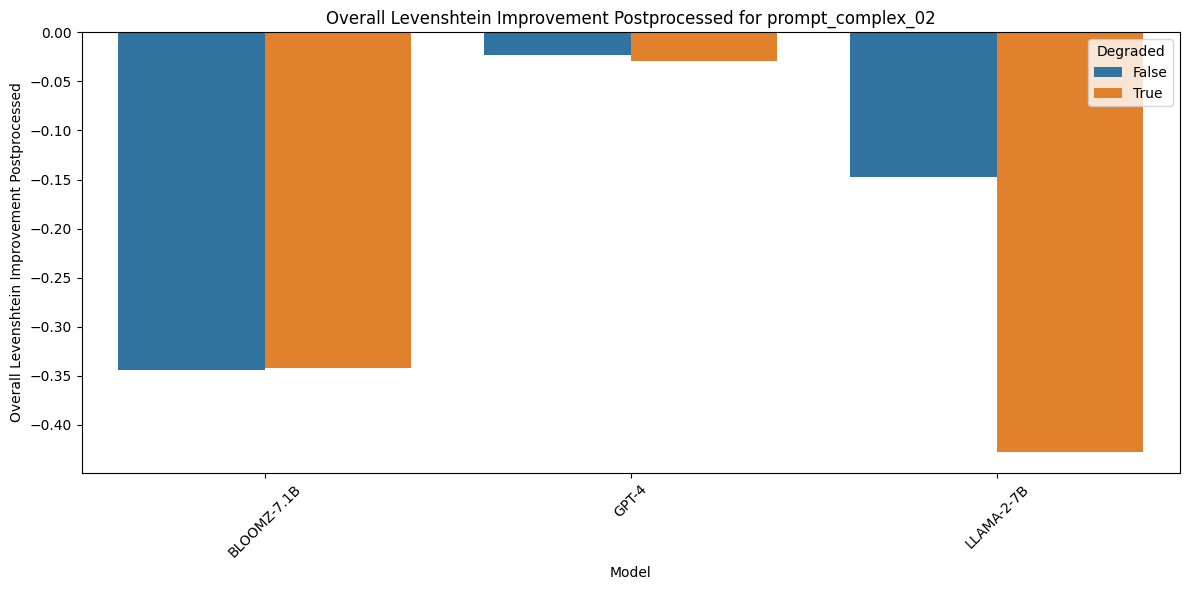

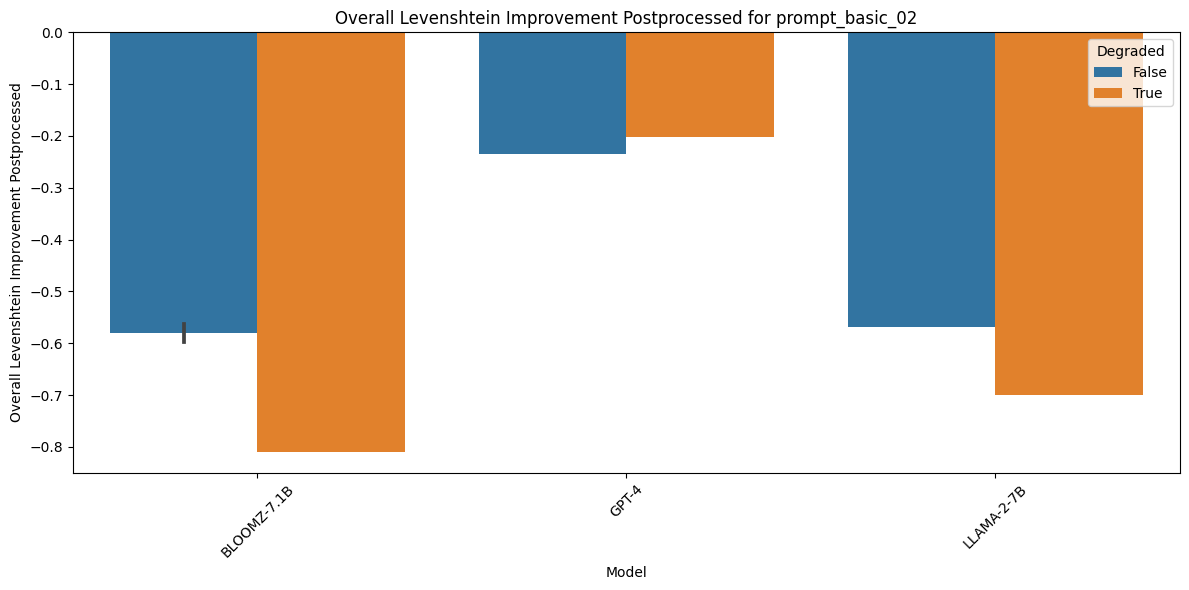

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


for data, dataset in zip(dataframes, datasets):
    # Prepare the data: Calculate mean 'overall-levenshtein-improvement-postprocessed' for each combination
    grouped_data = data.groupby(['prompt', 'model', 'Degraded (y/n)', 'Improved (y/n)'])['overall-levenshtein-improvement-postprocessed'].mean().reset_index()

    # Create a bar plot for each prompt
    prompts = data['prompt'].unique()
    for prompt in prompts:
        plt.figure(figsize=(12, 6))
        prompt_data = grouped_data[grouped_data['prompt'] == prompt]

        sns.barplot(x='model', y='overall-levenshtein-improvement-postprocessed', hue='Degraded (y/n)', data=prompt_data)

        plt.title(f'Overall Levenshtein Improvement Postprocessed for {prompt}')
        plt.xlabel('Model')
        plt.ylabel('Overall Levenshtein Improvement Postprocessed')
        plt.xticks(rotation=45)
        plt.legend(title='Degraded', loc='upper right')
        plt.tight_layout()
        plt.show()



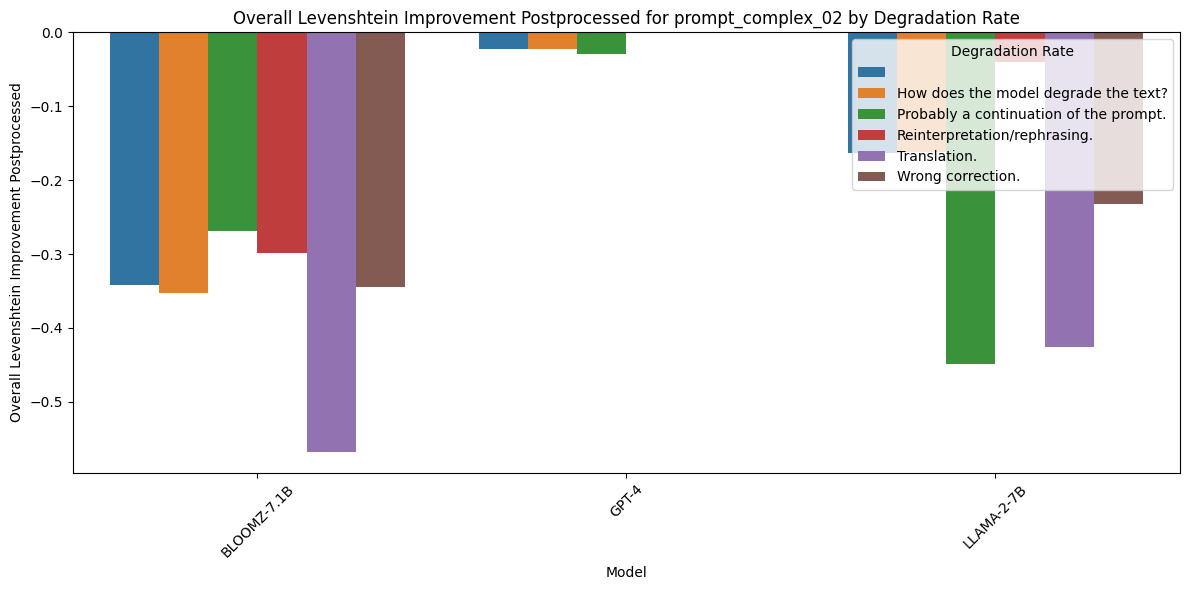

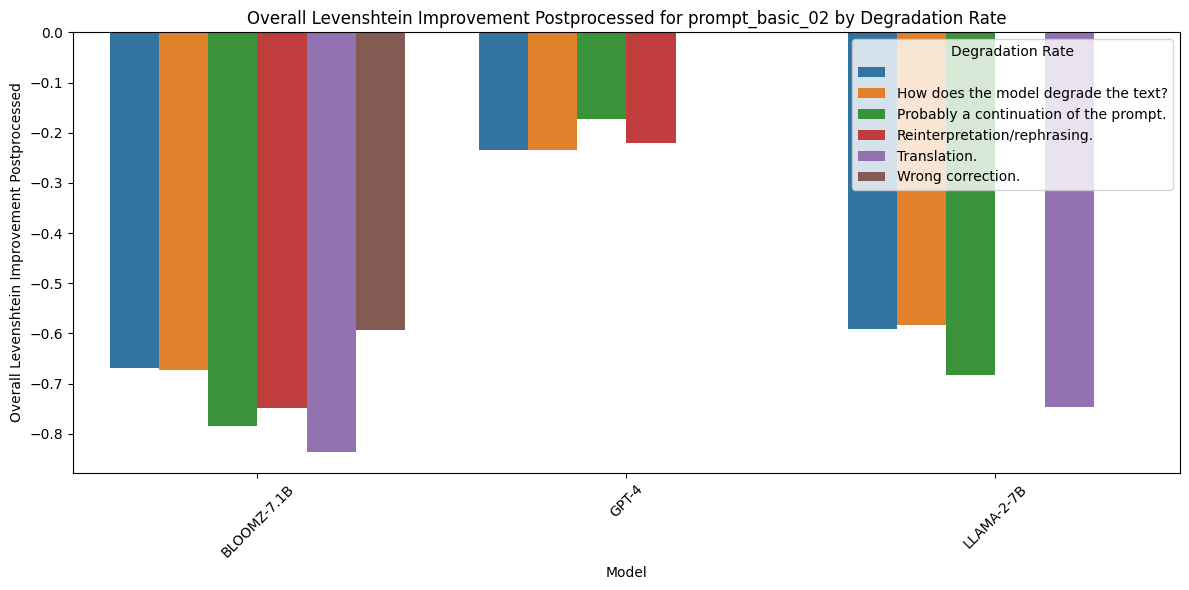

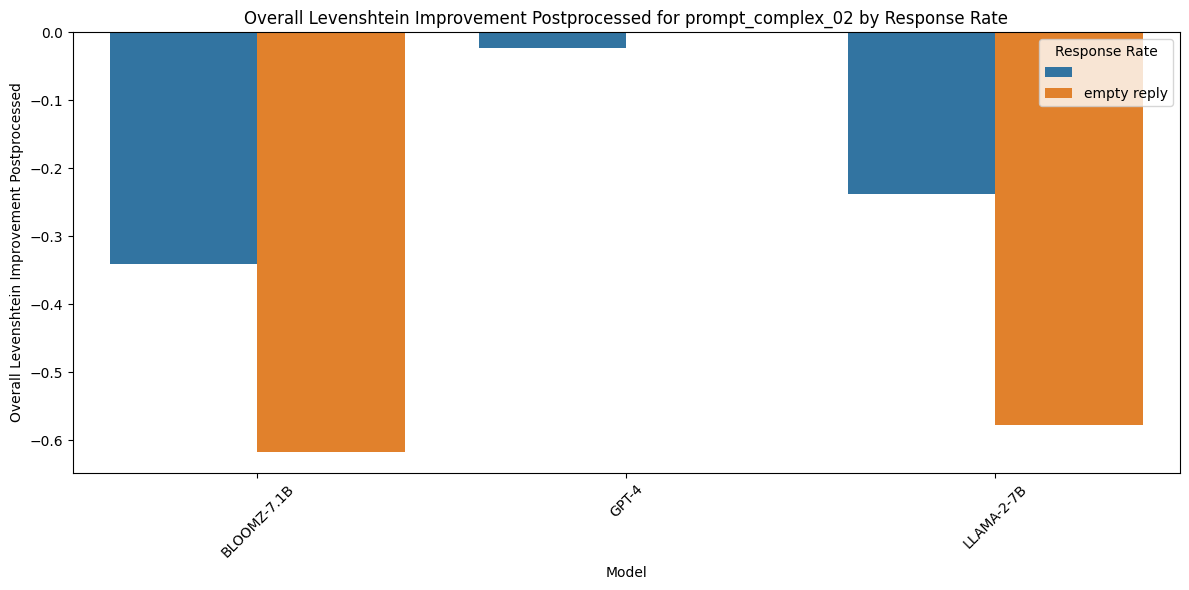

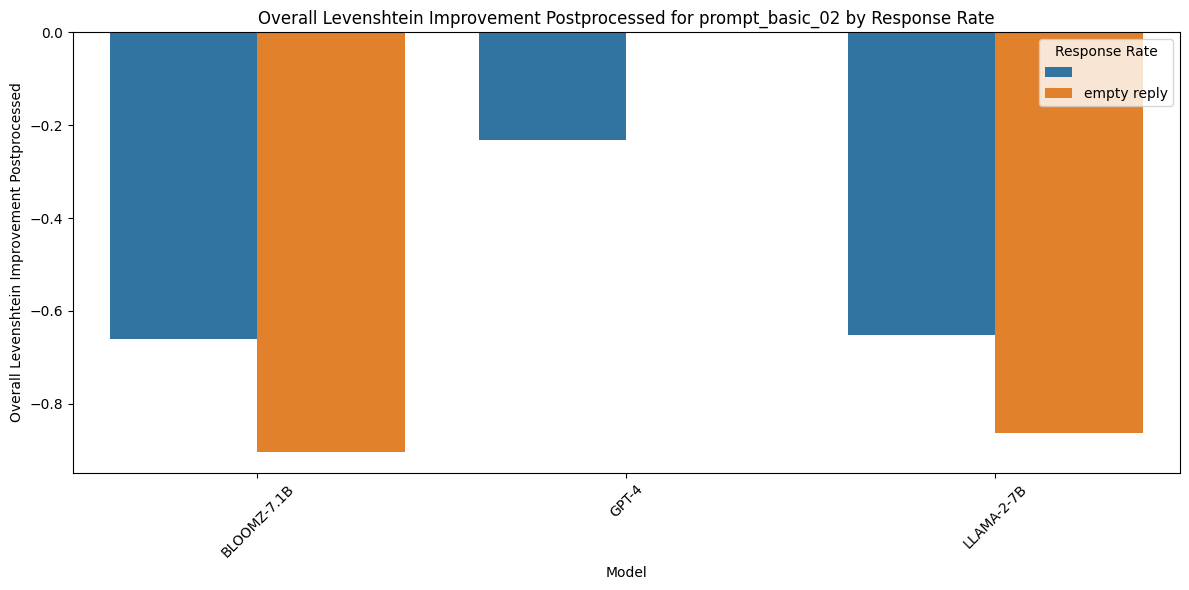

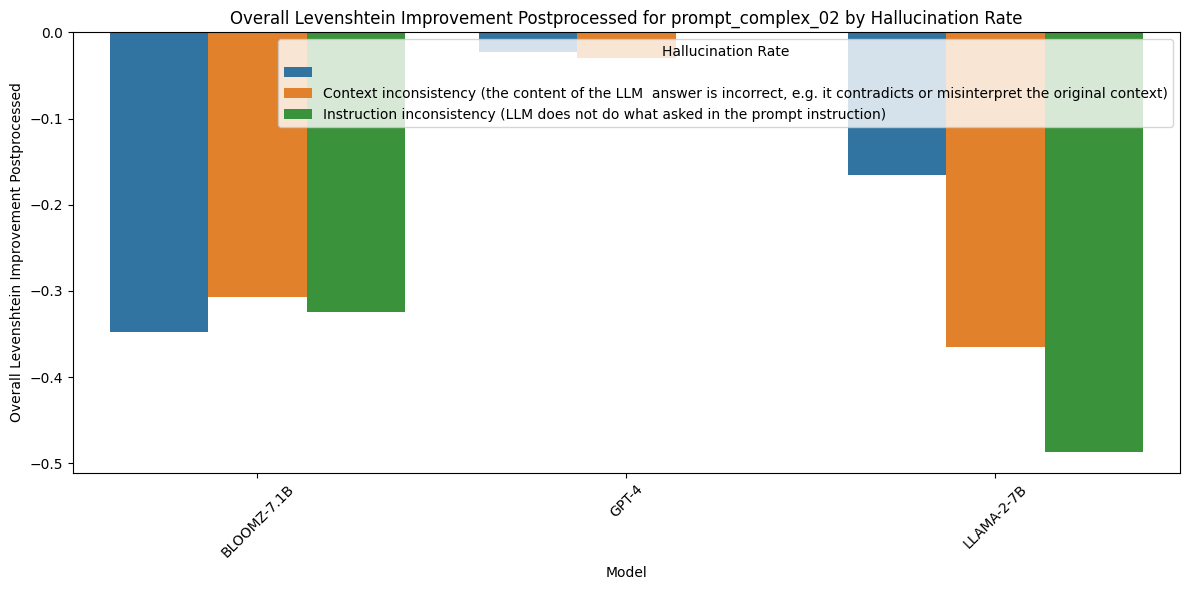

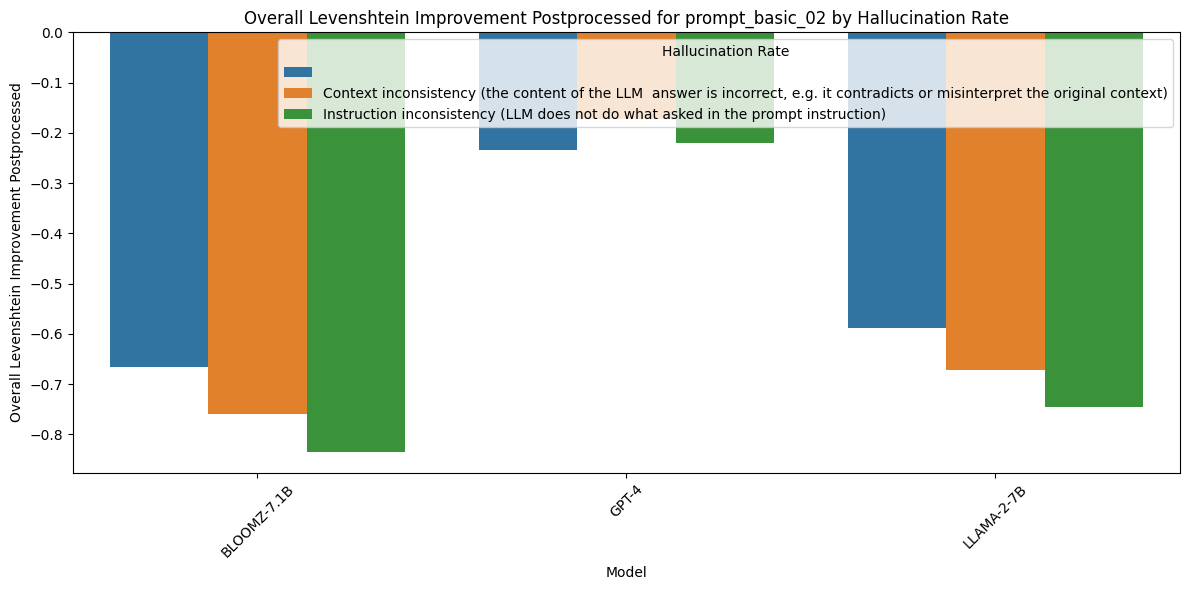

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Prepare the data: Calculate mean 'overall-levenshtein-improvement-postprocessed' for each category in the rates
rate_columns = ['Degradation Rate', 'Response Rate', 'Hallucination Rate']
for rate_column in rate_columns:
    grouped_data = data.groupby(['prompt', 'model', rate_column])['overall-levenshtein-improvement-postprocessed'].mean().reset_index()

    # Create a bar plot for each prompt
    prompts = data['prompt'].unique()
    for prompt in prompts:
        plt.figure(figsize=(12, 6))
        prompt_data = grouped_data[grouped_data['prompt'] == prompt]

        sns.barplot(x='model', y='overall-levenshtein-improvement-postprocessed', hue=rate_column, data=prompt_data)

        plt.title(f'Overall Levenshtein Improvement Postprocessed for {prompt} by {rate_column}')
        plt.xlabel('Model')
        plt.ylabel('Overall Levenshtein Improvement Postprocessed')
        plt.xticks(rotation=45)
        plt.legend(title=rate_column, loc='upper right')
        plt.tight_layout()
        plt.show()


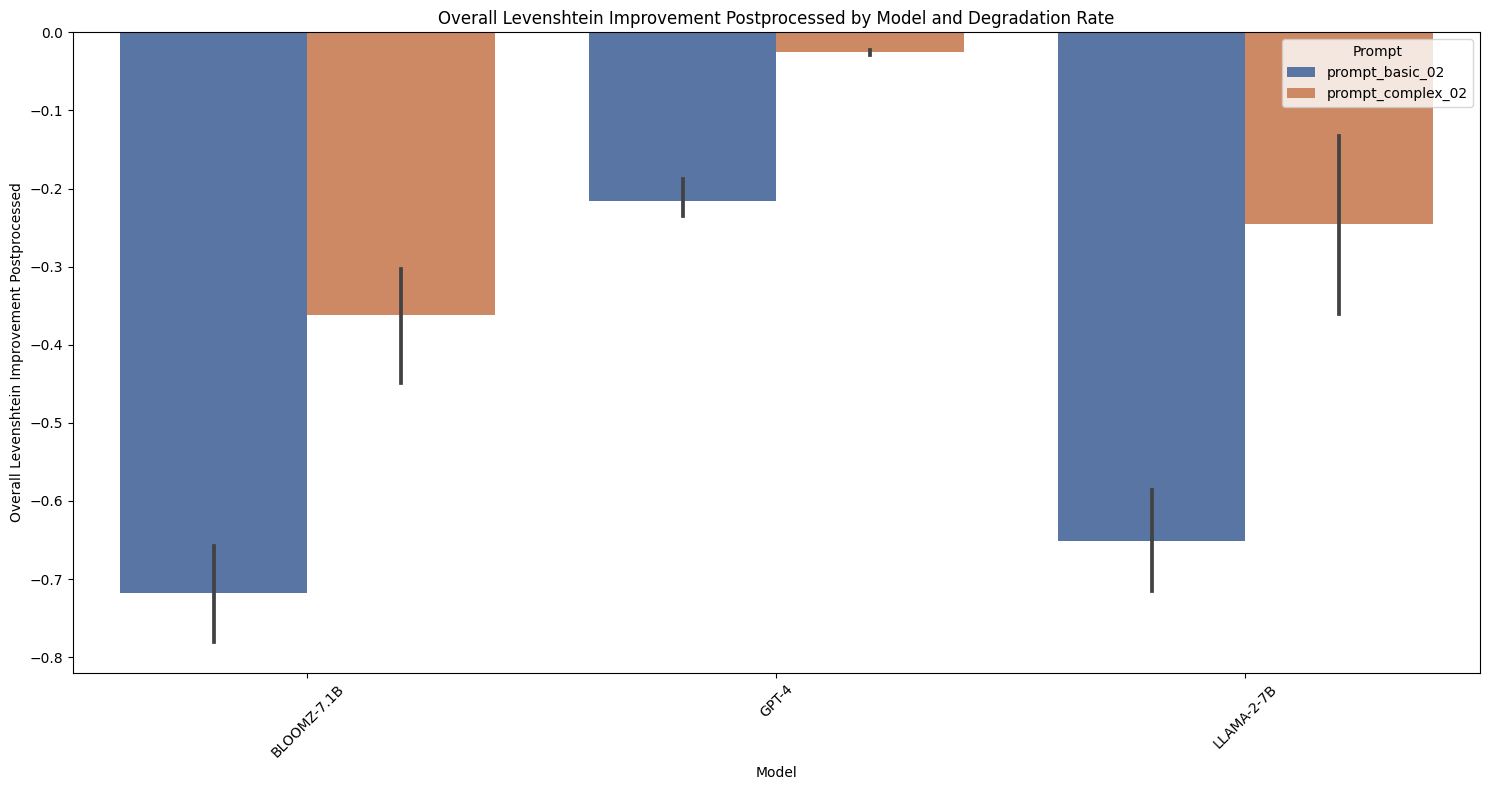

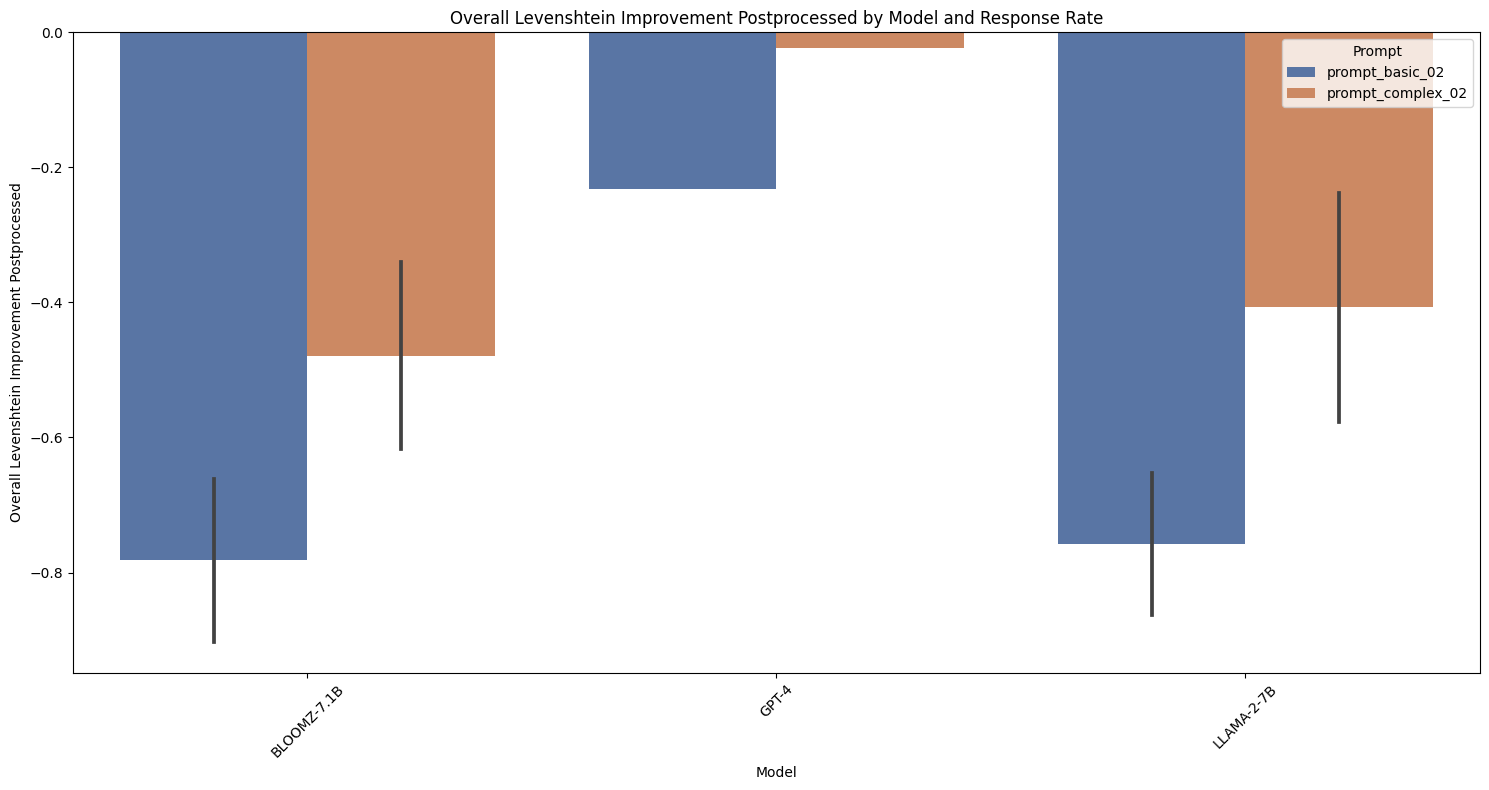

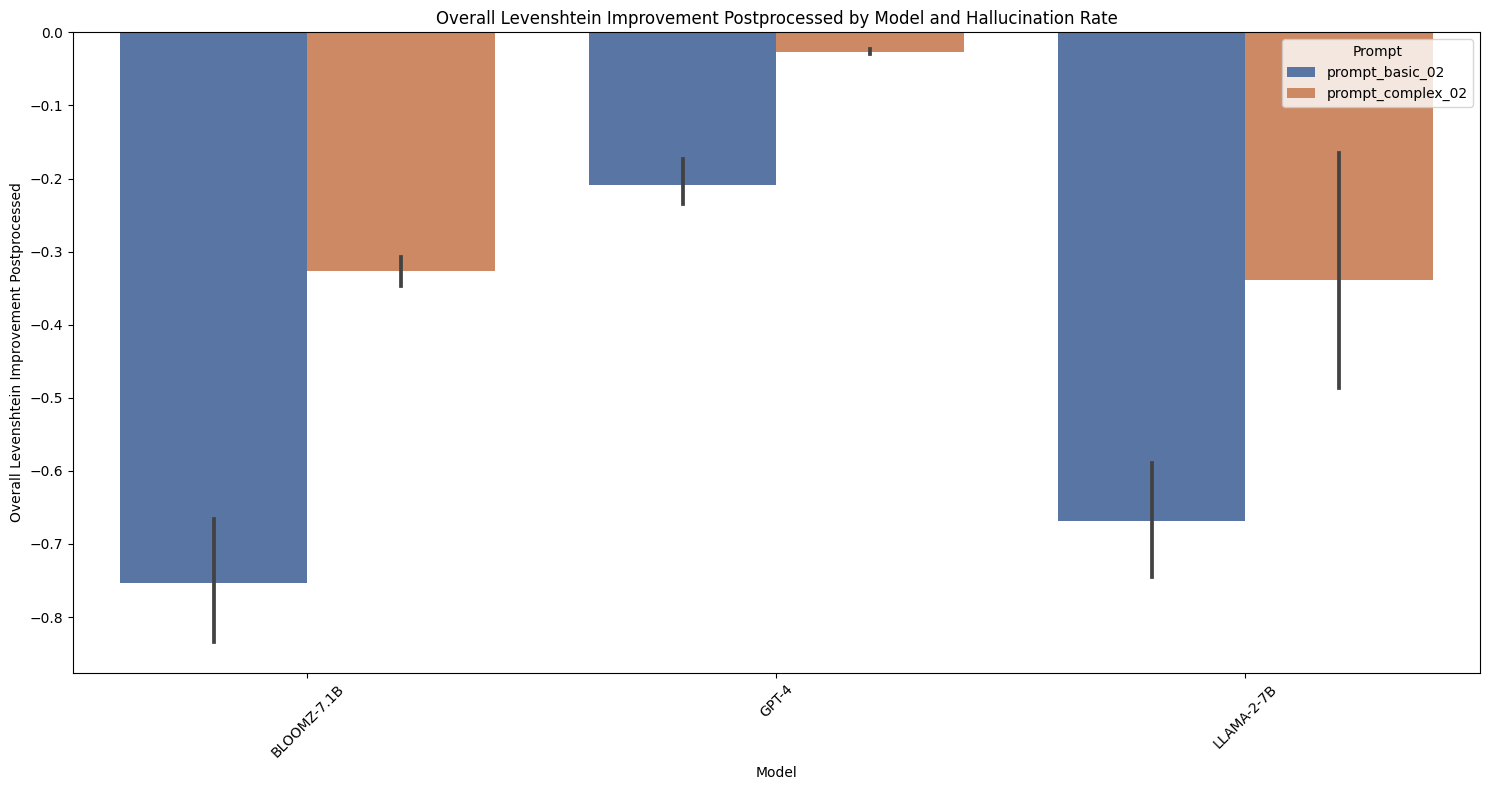

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Rate columns to be visualized
rate_columns = ['Degradation Rate', 'Response Rate', 'Hallucination Rate']

# Creating a bar plot for each rate column, combining all prompts
for rate_column in rate_columns:
    plt.figure(figsize=(15, 8))

    # Grouping data by 'model', 'prompt', and the current rate column
    grouped_data = data.groupby(['model', 'prompt', rate_column])['overall-levenshtein-improvement-postprocessed'].mean().reset_index()

    # Creating a bar plot
    sns.barplot(x='model', y='overall-levenshtein-improvement-postprocessed', hue='prompt', data=grouped_data, palette="deep")

    plt.title(f'Overall Levenshtein Improvement Postprocessed by Model and {rate_column}')
    plt.xlabel('Model')
    plt.ylabel('Overall Levenshtein Improvement Postprocessed')
    plt.xticks(rotation=45)
    plt.legend(title='Prompt', loc='upper right')
    plt.tight_layout()
    plt.show()


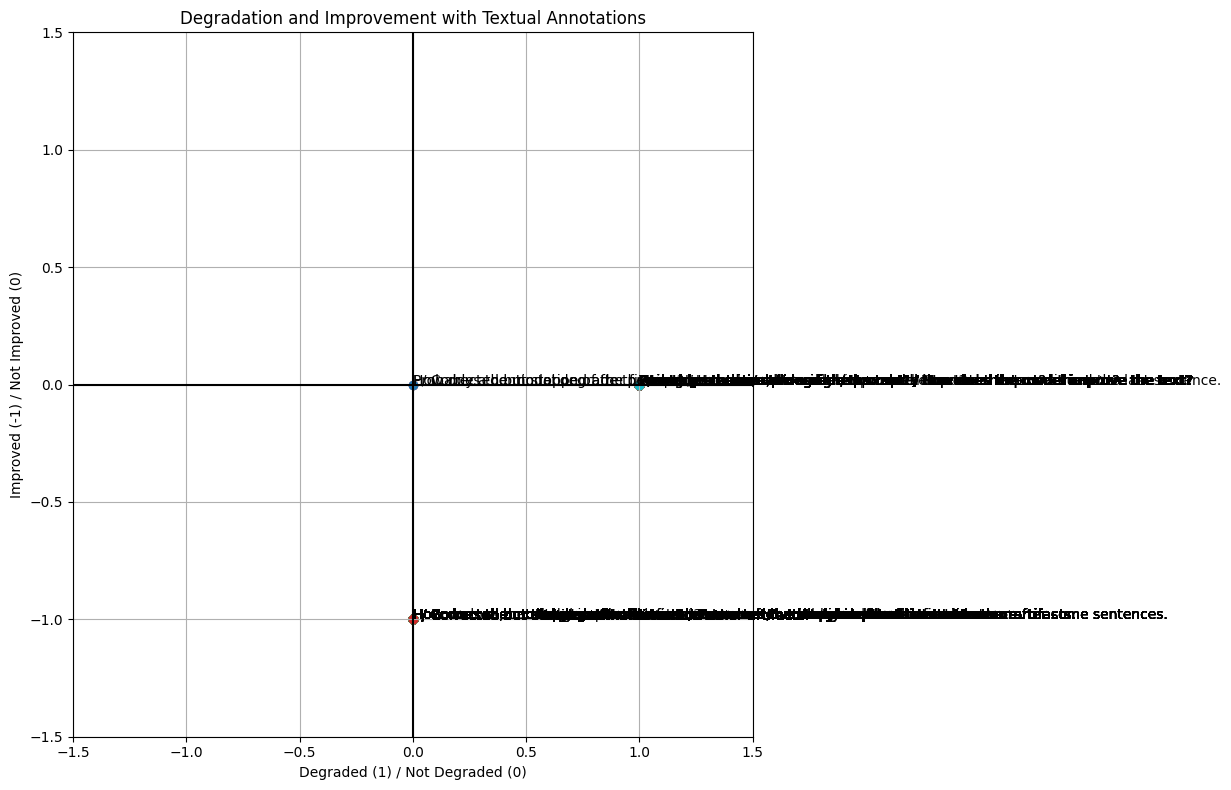

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data for plotting
# Convert 'Degraded (y/n)' and 'Improved (y/n)' to numeric for plotting
data['Degraded_Num'] = data['Degraded (y/n)'].astype(int)  # 0 for False, 1 for True
data['Improved_Num'] = data['Improved (y/n)'].astype(int) * -1  # 0 for False, -1 for True

# Create a scatter plot
plt.figure(figsize=(12, 8))
for _, row in data.iterrows():
    plt.scatter('Degraded_Num', 'Improved_Num', data=row, marker='o')
    # Annotate with text from 'Degradation Rate' and 'Improvement Rate'
    
    text = f"{row['Degradation Rate']} / {row['Improvement Rate']}"
    
    plt.text(row['Degraded_Num'], row['Improved_Num'], text)

# Customize the plot
plt.xlabel('Degraded (1) / Not Degraded (0)')
plt.ylabel('Improved (-1) / Not Improved (0)')
plt.title('Degradation and Improvement with Textual Annotations')
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.tight_layout()

# Show the plot
plt.show()


In [8]:
data['Degraded_Num']

0      0
1      0
2      0
3      0
4      0
      ..
595    1
596    1
597    1
598    1
599    1
Name: Degraded_Num, Length: 600, dtype: int64

In [9]:
data

,language,filename,dataset_name,Degraded (y/n),Degradation Rate,Improved (y/n),Improvement Rate,Hallucination Rate,Response Rate,prompt,...,line-lev-pred-postprocessed,line-lev-improvement-postprocessed,article_id,File,Date,Type,NbAlignedChar,century,Degraded_Num,Improved_Num
0,en,../../data/datasets/ocr/original/overproof/dat...,overproof,False,How does the model degrade the text?,True,Corrected but stopped after first sentence.,,,prompt_complex_02,...,0.736842,-0.214035,29764000 year 1946 type Article title The Sydn...,,,,,,0,-1
1,en,../../data/datasets/ocr/original/overproof/dat...,overproof,False,,False,Corrected but stopped after first sentence.,,,prompt_complex_02,...,0.736842,-0.214035,29764000 year 1946 type Article title The Sydn...,,,,,,0,0
2,en,../../data/datasets/ocr/original/overproof/dat...,overproof,False,How does the model degrade the text?,True,"Corrected, but the groundtruth contains errors.",,,prompt_complex_02,...,0.700000,-0.253333,29764000 year 1946 type Article title The Sydn...,,,,,,0,-1
3,en,../../data/datasets/ocr/original/overproof/dat...,overproof,False,,True,,,,prompt_complex_02,...,0.700000,-0.253333,29764000 year 1946 type Article title The Sydn...,,,,,,0,-1
4,en,../../data/datasets/ocr/original/overproof/dat...,overproof,False,How does the model degrade the text?,True,"Corrected, but the groundtruth contains errors.",,,prompt_complex_02,...,0.937500,0.000000,29764000 year 1946 type Article title The Sydn...,,,,,,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,en,../../data/datasets/ocr/original/overproof/dat...,overproof,True,Probably a continuation of the prompt.,False,,Instruction inconsistency (LLM does not do wha...,,prompt_basic_02,...,0.581818,-0.349733,4 year 1871 type Article title THE CARIRO DAIL...,,,,,,1,0
596,en,../../data/datasets/ocr/original/overproof/dat...,overproof,True,Probably a continuation of the prompt.,False,How does the model improve the text?,Context inconsistency (the content of the LLM ...,,prompt_basic_02,...,0.218182,-0.756150,4 year 1871 type Article title THE CARIRO DAIL...,,,,,,1,0
597,en,../../data/datasets/ocr/original/overproof/dat...,overproof,True,Probably a continuation of the prompt.,False,,Context inconsistency (the content of the LLM ...,,prompt_basic_02,...,0.218182,-0.756150,4 year 1871 type Article title THE CARIRO DAIL...,,,,,,1,0
598,en,../../data/datasets/ocr/original/overproof/dat...,overproof,True,Probably a continuation of the prompt.,False,How does the model improve the text?,Context inconsistency (the content of the LLM ...,,prompt_basic_02,...,0.842105,-0.058824,4 year 1871 type Article title THE CARIRO DAIL...,,,,,,1,0
